In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import math

In [6]:
# List of prices according to: http://codekata.com/kata/kata09-back-to-the-checkout/
items = ['A', 'B', 'C', 'D']
data = {'A': [50], 
        'B': [30],
        'C': [20],
        'D': [15]}
df = pd.DataFrame(data, columns = items)
df #from this row I will sample data, which is the "picking" of items in shops

,A,B,C,D
0,50,30,20,15


In [118]:
#Offers or Promotions according the instructions: http://codekata.com/kata/kata09-back-to-the-checkout/
offer_A = 130 # 3 items
offer_B = 45  # 2 items

In [126]:
#1. This is a f(x) to generate a list of items bought which need to be checked (sumed)
def generator_seq(num_elements):
    b = df.iloc[0,].sample(n = num_elements, replace=True, random_state = 999)
    return b

#2. This is a f(x) to count those items
def count_items(lista): 
    lista.iloc[0:,]
    a = lista.tolist()
    t = {x:a.count(x) for x in a}
    return t

#3. This is a f(x) to visualize graphically counts (f(x)2)
def visual(counts):
    #quick plot the freq of items :-)
    plt.bar(*zip(*counts.items()))
    plt.title('item vs frequencies')
    plt.xlabel('categories of products/PRICE')
    plt.ylabel('frequency')
    plt.show()
    
    print("Price", "Freq")
    for newkey in counts:
        print(newkey, counts[newkey])
        
#4. this is the checkout function which calculate the total according the promotions
def check_out(item1, item2, promo1, promo2, counts_dic): #(50, 30, offer_A, offer_B, counts_dic)
    calc = 0
    total = list()
    t = counts_dic
    
    for newkey in t:
        # This is for the first PROMO (offer) which include 3 items for a small price

        if newkey == item1:
            #for frequencies divisible by 3 e.g. 6, 9, 12....
            if t[newkey] % 3 == 0 and t[newkey] >= 3:
                val_1 = int(t[newkey]/3)
                calc = (val_1*offer_A)
                total.append(calc)

            # for frequencies not divisible by 3 e.g. 4, 5, 7, 11...
            elif t[newkey] % 3 == 1 and t[newkey] > 3:
                frac, whole = math.modf(t[newkey]/3) #split the float: (whole, frac) => eg. (2.6)
                frac = 1 if frac <= 0.6 else 2      # two posibilities 0.3 or 0.6. OR 1 or 2
                calc = (whole*offer_A) + int(newkey*frac) #make the calculation
                total.append(calc)

            elif t[newkey] < 3:
                total.append(int(newkey*t[newkey]))

        # This is for the second PROMO which includes 2 items for a small price:
        elif newkey == item2:

            #for even frequencies larger or equal to 2, eg. 2, 4, 6, 8, ...106
            if t[newkey] % 2 == 0 and t[newkey] >= 2:
                val_1 = int(t[newkey]/2)
                calc = (val_1*offer_B)
                total.append(calc)

            # for odd frequencies eg. 3, 5, 7,.... 19    
            elif t[newkey] % 2 == 1 and t[newkey] > 2:
                val_1 = int(t[newkey]/2)
                calc = (val_1*offer_B) + int(newkey) # always: + 1value
                total.append(calc)

            elif t[newkey] == 1:
                total.append(int(newkey))
        else: 
            total.append(int(newkey*t[newkey]))


    return sum(total)

In [127]:
# call the functions:
# 1.creare 10 items
g = generator_seq(12)
print(g)

A    50
A    50
B    30
B    30
A    50
B    30
D    15
D    15
B    30
D    15
A    50
B    30
Name: 0, dtype: int64


In [128]:
# call the functions:
# 2.count each items == get frequency of each item
h = count_items(g)   
print(h)

{50: 4, 30: 5, 15: 3}


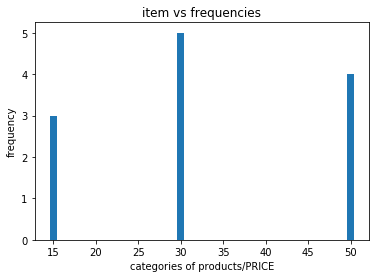

Price Freq
50 4
30 5
15 3


In [129]:
# call the functions:
# 3.count each items == get frequency of each item
visual(h)

In [130]:
# 4. Run the "check_out" and sum the elements
check_out(50, 30, offer_A, offer_B, h) #(50, 30, offer_A, offer_B, counts_dic)
#TOTAL

345.0

In [131]:
# doble check manually =
Total = 130 + 50 + 45 + 45 + 30 + 45
print(Total)
# Voi lá

345


In [ ]:
# In this way one can create different sequences as long as you want!